Este códico visa descobrir o número completo do CPF de uma pessoa a partir dos comprovantes de transferencia bancaria que so mostram 6 digitos.
O digitos mostrados seguem no formato: `***.123.456-**` .
Utilizaremos o algoritimo teorico da receita federal para isso.



Toda pessoa que se inscreve no Cadastro de Pessoas Físicas da Receita Federal do Brasil recebe um número de inscrição de onze dígitos decimais com a seguinte configuração: ABC.DEF.GHI-JK.

Os primeiros oito
Os primeiros oito dígitos, ABCDEFGH, formam o número-base definido pela Receita Federal no momento da inscrição.
O nono dígito, I, define a Região Fiscal responsável pela inscrição.
O penúltimo, J, é o dígito verificador dos nove primeiros.
O último, K, é o dígito verificador dos noves anteriores a ele.
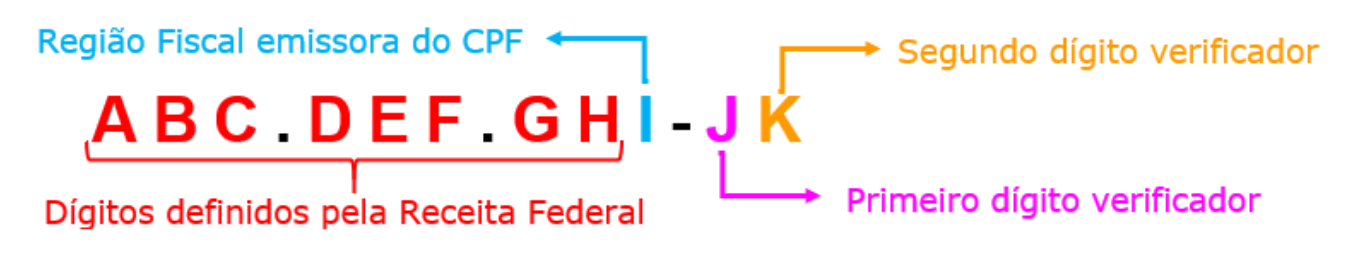

 Região Fiscal onde é emitido o CPF (definida pelo nono dígito) tem as seguintes identificações:

1 – DF, GO, MS, MT e TO
2 – AC, AM, AP, PA, RO e RR
3 – CE, MA e PI
4 – AL, PB, PE, RN
5 – BA e SE
6 – MG
7 – ES e RJ
8 – SP
9 – PR e SC
0 – RS

No caso da 10ª Região Fiscal (Rio Grande do Sul), o algarismo zero é utilizado como nono dígito.

Mas o que são os Dígitos Verificadores?

É aqui que a Matemática entra.
De maneira geral, Dígitos Verificadores (DV) são dígitos incorporados a números para possibilitar a detecção de erros de digitação. Recurso muito difundido, por exemplo, na numeração de contas bancárias.
Particularmente, no caso do CPF, os dois Dígitos Verificadores são calculados, a partir da esquerda, da seguinte maneira:



Os nove primeiros algarismos são ordenadamente multiplicados pela sequência 10, 9
, 8
, 7
, 6
, 5
, 4
, 3
, 2
 (o primeiro por 10
, o segundo por 9
, e assim sucessivamente). Em seguida, calcula-se o resto r
 da divisão da soma dos resultados das multiplicações por
11
:



- se esse resto for 0
 ou 1
, o primeiro dígito verificador é zero (d1=0
1
=
0
); caso contrário, d1=11−r
.

Verificando calculo do digito 01:

In [4]:

def digito_verificador(cpf:str):
  '''CPF: deve inserir os 9 digito do cpf'''
  cpf= cpf
  d=0
  for i in range(10,1,-1):
    #print(f'{cpf[10-i]}x{i}= {int(cpf[10-i])*i}')
    d = d + int(cpf[10-i])*i
  #coletando o resto da divisão por 11
  d = d%11
  if d == 0 or d == 1:
    d=0
  else:
    d = 11 - d
  return d



In [5]:
digito_verificador('016667134')

7

O segundo Dígito Verificador (d2
) é calculado pela mesma regra, na qual os números a serem multiplicados pela sequência 10
, 9
, 8
, 7
, 6
, 5
, 4
, 3
, 2
 são contados a partir do segundo algarismo, sendo d1
 o último algarismo. Se s
 é o resto da divisão por 11
 das somas das multiplicações, então:

d2 é zero, se s for 0
 ou 1
; caso contrário, d2=11−s.

In [49]:
digito_verificador('166671347')

3

In [67]:
#gerar cpf aleatorio
from random import randint
def numeroAleatorio():
  '''
Função para gerar os 9 primeiros digitos do CPF de maneira aleatoria
  '''
  dig_aleat=''
  for i in range(0,9):
    dig_aleat += str(randint(0,9))
  return dig_aleat


In [61]:
#1 digito verificador
cpf=numeroAleatorio() #gera numero aleatorio
cpf += str(digito_verificador(cpf))

In [62]:
print(cpf)

9919310263


In [63]:
#2 digito verificador
digito_verificador(cpf[1:10])
cpf +=str(digito_verificador(cpf[1:10]))

In [64]:
print(cpf)

99193102631


In [65]:
#cpf final formatado
cpf = cpf[0:9] + '-' + cpf[9:]
print(cpf)

991931026-31
